In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
df  = pd.read_csv("D:/Phyton excel/train_Loan_Assignment.csv")
df.head()
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [3]:
df.loc[df['Married'] =='Yes', 'Mar'] = 1
df.loc[df['Married'] =='No', 'Mar'] = 0
df.loc[df['Education'] =='Graduate', 'Educt'] = 1
df.loc[df['Education'] =='Not Graduate', 'Educt'] = 0
df.loc[df['Self_Employed'] =='Yes', 'Self'] = 1
df.loc[df['Self_Employed'] =='No', 'Self'] = 0
df.loc[df['Loan_Status'] =='Y', 'Loan'] = 1
df.loc[df['Loan_Status'] =='N', 'Loan'] = 0
df.head()
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Mar,Educt,Self,Loan
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,0.0,1.0,0.0,1.0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,1.0,1.0,0.0,1.0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,1.0,1.0,0.0,1.0
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,1.0,1.0,0.0,1.0
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N,0.0,1.0,1.0,0.0


In [4]:
#filling missing data with 0
df = df.fillna(0)
print(df.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         0.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  Mar  Educt  Self  Loan  
0             1.0         Urban           Y  0.0    1.0   0.0   1.0  
1             1.0 

In [5]:
#Making a new column
df['Income'] = (df['ApplicantIncome'] + df['CoapplicantIncome'])
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Mar,Educt,Self,Loan,Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,Y,0.0,1.0,0.0,1.0,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1.0,1.0,0.0,0.0,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1.0,1.0,1.0,1.0,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1.0,0.0,0.0,1.0,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.0,1.0,0.0,1.0,6000.0


In [6]:
#Extracting Independent and dependent Variable  
x= df.iloc[:, [14,15,16]].values  
y= df.iloc[:, 13].values  

In [7]:
# Splitting the dataset into training and test set.  
x_train, x_test, y_train, y_test= train_test_split(x, y, random_state=0)  

In [8]:
#feature Scaling  
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  
y_test

array([0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       1.])

In [9]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [10]:
y_pred = knn.predict(x_test)

In [11]:
confusion_matrix(y_test, y_pred)

array([[ 7, 57],
       [14, 76]], dtype=int64)

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.538961038961039

In [13]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred)

(array([0.33333333, 0.57142857]),
 array([0.109375  , 0.84444444]),
 array([0.16470588, 0.68161435]),
 array([64, 90], dtype=int64))

In [14]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.5714285714285714

In [15]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.8444444444444444

In [16]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.6816143497757847

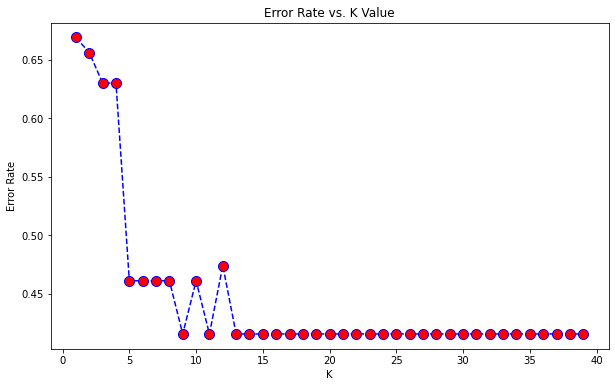

Minimum error:- 0.4155844155844156 at K = 9


In [17]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred_i = knn.predict(x_test)
 #print (pred_i)
 #print (1-accuracy_score(y_test, pred_i))
 error_rate.append(1-accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [18]:
knn = KNeighborsClassifier(n_neighbors=17, metric='euclidean')
knn.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=17)

In [19]:
y_pred = knn.predict(x_test)
accuracy_score(y_test, y_pred)

0.5844155844155844